room T = 24$^{\circ}$C = 297.15 K

distance (ball to detector) = .5 m

DCR = 20 points/s

diameter (ball) = .0495 m

length (string) = .875 m

height (string to ball) = .875 + .0495/2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import peakutils
from __future__ import division
%matplotlib inline

In [2]:
data = pd.read_csv('/home/kreidy/PHY-252-labs-master/csv data.csv')

In [3]:
data

,Latest: Time (s),Latest: Position (m),Latest: Velocity (m/s),Latest: Acceleration (m/s²)
0,0.05,0.823606,-0.488357,-1.354608
1,0.10,0.800983,-0.545540,-1.631983
2,0.15,0.773178,-0.635018,-1.964846
3,0.20,0.738983,-0.752876,-2.068967
4,0.25,0.697190,-0.861389,-1.766721
5,0.30,0.652115,-0.948027,-1.089897
6,0.35,0.598924,-0.967696,-0.427432
7,0.40,0.555058,-0.971246,-0.097224
8,0.45,0.502902,-0.984966,0.328290
9,0.50,0.453510,-0.942558,0.823523


In [4]:
data['time'] = data['Latest: Time (s)']
data['x'] = data['Latest: Position (m)']
data['v'] = data['Latest: Velocity (m/s)']
data['a'] = data['Latest: Acceleration (m/s²)']

In [5]:
data.drop(['Latest: Time (s)', 'Latest: Position (m)', 'Latest: Velocity (m/s)', 'Latest: Acceleration (m/s²)'], axis = 1)

,time,x,v,a
0,0.05,0.823606,-0.488357,-1.354608
1,0.10,0.800983,-0.545540,-1.631983
2,0.15,0.773178,-0.635018,-1.964846
3,0.20,0.738983,-0.752876,-2.068967
4,0.25,0.697190,-0.861389,-1.766721
5,0.30,0.652115,-0.948027,-1.089897
6,0.35,0.598924,-0.967696,-0.427432
7,0.40,0.555058,-0.971246,-0.097224
8,0.45,0.502902,-0.984966,0.328290
9,0.50,0.453510,-0.942558,0.823523


/home/kreidy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


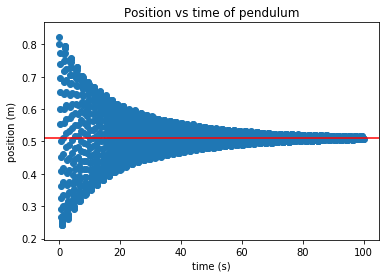

In [21]:
ax = plt.subplot()
fig = plt.subplot(111)
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('Position vs time of pendulum')
ax.scatter(data['time'], data['x'])
ax.axhline(np.average(data['x']), color=(1,0,0))
ax.figure.savefig('lab1_x-t_plot')

In [7]:
midp = np.average(data['x'])

In [8]:
midp

0.51180992059999997

In [16]:
data['x'][0]-midp

0.31179637940000005